# Gamma Shielding Material Analysis: Lead, HY80, and 30MnB5

This project aims to compare the gamma shielding properties of three materials—Lead, HY80, and 30MnB5—for potential applications in military ships. The analysis involves gamma spectroscopy to evaluate key parameters such as peak intensity, full width at half maximum (FWHM), and Compton edge stability across varying material thicknesses.

---

## **Project Objectives**
1. Evaluate the gamma attenuation efficiency of Lead, HY80, and 30MnB5.
2. Analyze the scattering profiles using FWHM and Gaussian fits.
3. Investigate the stability of Compton edges to understand photon energy interactions.
4. Identify the most suitable material or hybrid shielding design for submarine applications.

---

## **Project Workflow**
1. **Data Preparation**:
   - ROOT files generated for each material at thicknesses ranging from 0 cm to 25 cm.
   - Gamma spectra using ROOT’s TTree and TCanvas structures.

2. **Analysis**:
   - Key parameters such as peak intensity, FWHM, and Compton edges for each material and thickness.
   - Trends to highlight material performance.

3. **Visualization**:
   - Plots to compare peak intensity, FWHM, and Compton edges across materials and thicknesses.
   - Gaussian fits to analyze scattering profiles.

4. **Recommendations**:
   - Future recommendations after full analysis of data.

---

## Key Metrics

### Linear Attenuation Coefficient (µ)
- Lead: 0.1214 cm⁻¹
- HY80: 0.0573 cm⁻¹
- 30MnB5: 0.0570 cm⁻¹

### Density
- Lead: 11.34 g/cm³
- HY80: 7.87 g/cm³
- 30MnB5: 7.835 g/cm³

### Mass Required for Equivalent Attenuation (at 10 cm Thickness)
- Lead: 13.77 g/cm²
- HY80: 4.51 g/cm²
- 30MnB5: 4.47 g/cm²


---

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

### Normalization and Scaling (for Gamma Shielding Analysis)

In the **gamma shielding** analysis, normalization ensures that photon attenuation measurements are aligned across different datasets, while scaling converts the raw data into meaningful physical units such as **linear attenuation coefficients** (µ) and photon intensity. This process allows for a fair comparison between different materials like Lead, HY80, and 30MnB5.

1. **Normalization of Photon Intensity:**  
   This step ensures consistent measurements by normalizing photon counts using the reference photon intensity at **0 cm thickness (I₀)**.

2. **Scaling to Linear Attenuation Coefficient (µ):**  
   The linear attenuation coefficient is calculated using the formula:  
   $$
   \mu = \frac{1}{t} \cdot \ln\left(\frac{I_0}{I}\right)
   $$  
   where:  
   - \($\mu$): Linear attenuation coefficient (cm⁻¹)  
   - \($I_0$): Initial photon intensity (without shielding)  
   - \($I$): Photon intensity after passing through the material  
   - \($t$): Shielding thickness (cm)

3. **Data from Known Thicknesses:**  
   Measurements were taken at various thicknesses for each material (from 0 cm to 25 cm). These measurements were used to determine the linear attenuation coefficient for each material and compare their attenuation performance.


In [ ]:
def calculate_linear_attenuation_coefficient(I, thickness):
    """
    Calculate the linear attenuation coefficient (µ) for a given material.
    
    Parameters:
        I (float): Intensity of photons after passing through the material.
        thickness (float): Thickness of the material (in cm).
    
    Returns:
        float: Linear attenuation coefficient in cm^-1. If thickness or intensity is 0, returns 0.
    """
    I0 = 997578  # Initial intensity of photons (no shielding), constant for all materials.
    
    # Ensure thickness and intensity are non-zero and positive
    if thickness == 0 or I == 0:
        return 0
    if thickness < 0:
        raise ValueError("Thickness must be greater than 0.")
    if I < 0:
        raise ValueError("I (intensity) must be a positive value.")

    # Calculate the linear attenuation coefficient using the formula: µ = -ln(I/I0) / thickness
    mu = -np.log(I / I0) / thickness

    return mu


# Load the Excel file containing data for each material
df = pd.read_excel("../data/material.xlsx", sheet_name=None)

# Select relevant columns from the "Composition" sheet
df["Composition"] = df["Composition"].iloc[:, [1, 2, 3, 5]]

# Extract data for HY80 and 30MnB5 materials from specific rows
hy_df = df["Composition"].iloc[2:15, :]
mnb_df = df["Composition"].iloc[24:40, :]

# Set the first row as column headers for both dataframes
hy_df.columns = hy_df.iloc[0, :]
mnb_df.columns = mnb_df.iloc[0, :]

# Remove the first row (now redundant) and reset the index
hy_df = hy_df[1:].reset_index(drop=True)
mnb_df = mnb_df[1:].reset_index(drop=True)

# Correct a specific cell value in mnb_df for accuracy
mnb_df.iloc[14, 0] = "Fe"

# Extract simulation data for HY80, 30MnB5, and Lead from the "Simulation ROOT" sheet
hy_root = df["Simulation ROOT"].iloc[1:28, 1:4]
mnb_root = df["Simulation ROOT"].iloc[1:29, 6:9]
lead_root = df["Simulation ROOT"].iloc[1:15, 11:15]

# Set the first row as column headers for each extracted dataframe
hy_root.columns = hy_root.iloc[0, :]
mnb_root.columns = mnb_root.iloc[0, :]
lead_root.columns = lead_root.iloc[0, :]

# Remove the first row (now redundant) and reset the index for all three dataframes
hy_root = hy_root[1:].reset_index(drop=True)
lead_root = lead_root[1:].reset_index(drop=True)
mnb_root = mnb_root[1:].reset_index(drop=True)

# Rename columns for consistency (adding "in cm" to the shielding thickness column)
mnb_root.rename(columns={"Shielding thickness ": "Shielding thickness (in cm)"}, inplace=True)
lead_root.rename(columns={"Shielding thickness ": "Shielding thickness (in cm)"}, inplace=True)
hy_root.rename(columns={"Shielding thickness ": "Shielding thickness (in cm)"}, inplace=True)

# Convert the shielding thickness values to integers for easier computation
mnb_root.iloc[:, 0] = mnb_root.iloc[:, 0].apply(lambda x: int(x.split()[0]))
hy_root.iloc[:, 0] = hy_root.iloc[:, 0].apply(lambda x: int(x.split()[0]))
lead_root.iloc[:, 0] = lead_root.iloc[:, 0].apply(lambda x: int(x.split()[0]))

# Get column names for reference in later calculations
columns = mnb_root.columns

# Calculate the linear attenuation coefficient for each row in the dataframes
mnb_root['Linear At. (cm^-1)'] = mnb_root.apply(
    lambda row: calculate_linear_attenuation_coefficient(row[columns[1]], row[columns[0]]), axis=1
)
lead_root['Linear At. (cm^-1)'] = lead_root.apply(
    lambda row: calculate_linear_attenuation_coefficient(row[columns[1]], row[columns[0]]), axis=1
)
hy_root['Linear At. (cm^-1)'] = hy_root.apply(
    lambda row: calculate_linear_attenuation_coefficient(row[columns[1]], row[columns[0]]), axis=1
)


### Getting to know, how the dataframes look like.

In [3]:
display(mnb_root.head())
display(lead_root.head())
display(hy_root.head())
display(hy_df.head())
display(mnb_df.head())

1,Shielding thickness(in cm),# Passing photons,# attenuated Photons,Linear At. (cm-1)
0,0,997578,2422,0.000000
1,1,564006,435994,0.570265
2,2,319006,680994,0.570060
3,3,180836,819164,0.569247
4,4,102453,897547,0.568982


1,Shielding thickness(in cm),# Passing photons,# attenuated Photons,Linear At. (cm-1)
0,0,997578,2422,0.000000
1,1,296229,703771,1.214198
2,2,87904,912096,1.214543
3,3,26231,973769,1.212796
4,4,7841,992159,1.211491


1,Shielding thickness(in cm),# Passing photons,# attenuated Photons,Linear At. (cm-1)
0,0,997578,2422,0.000000
1,1,562477,437523,0.572980
2,2,317344,682656,0.572672
3,3,179343,820657,0.572010
4,4,101316,898684,0.571771


2,Components,Fraction,Density (g/cm3),(Fraction)x(Density)
0,Fe,0.931,7.874,7.330694
1,Ni,0.0322,8.912,0.286966
2,Cr,0.018,7.15,0.1287
3,Cu,0.0025,8.93,0.022325
4,Mo,0.006,10.2,0.0612


24,Components,Fraction,Density (g/cm3),(Fraction)x(Density)
0,Cr,0.001,7.15,0.00715
1,Ni,0.0006,8.912,0.005347
2,C,0.0031,2.267,0.007028
3,Mn,0.0125,7.3,0.09125
4,Si,0.0022,2.3296,0.005125


# Plotting Passing Photons vs. Shielding Thickness

## Objective
In this section, we aim to visualize the relationship between **shielding thickness** and the **number of passing photons** for three different materials: **Lead (Pb)**, **HY80**, and **30MnB5**. This comparison helps assess the attenuation performance of each material as the shielding thickness increases.

## What We Will Do:
1. **Load Data**: The data for each material contains photon counts for different shielding thicknesses.
2. **Plot Data**: We will create a plot with three curves, one for each material, representing the number of photons that pass through the material at varying thicknesses.
   - **Lead (Pb)**: Represented by a line with circle markers.
   - **HY80**: Represented by a line with triangle markers.
   - **30MnB5**: Represented by a line with star markers.
3. **Add Labels and Title**:  
   - The **x-axis** represents **shielding thickness (in cm)**.  
   - The **y-axis** represents **the number of photons passing through the material**.  
   - A title will summarize the plot.

4. **Add Legend and Grid**: These will help make the plot easier to read and distinguish between the three materials.


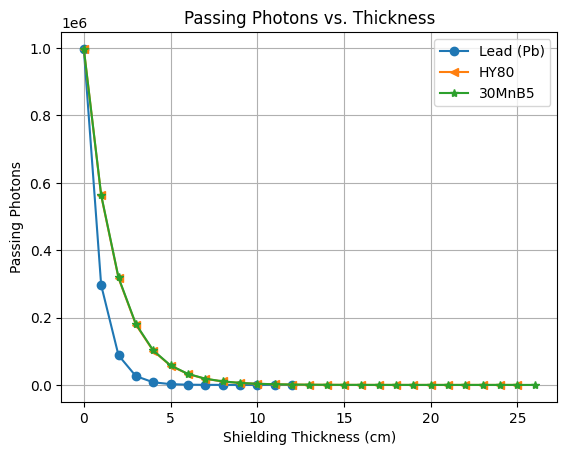

In [ ]:
# Create a new figure for the plot
plt.figure()

# Plot the number of passing photons for each material as a function of shielding thickness
# Lead (Pb) data is plotted with circle markers ('o')
plt.plot(lead_root["Shielding thickness(in cm)"], lead_root["# Passing photons "], label='Lead (Pb)', marker='o')

# HY80 data is plotted with triangle markers ('<')
plt.plot(hy_root["Shielding thickness(in cm)"], hy_root["# Passing photons "], label='HY80', marker='<')

# 30MnB5 data is plotted with star markers ('*')
plt.plot(mnb_root["Shielding thickness(in cm)"], mnb_root["# Passing photons "], label='30MnB5', marker='*')

# Label the x-axis as "Shielding Thickness (cm)"
plt.xlabel("Shielding Thickness (cm)")

# Label the y-axis as "Passing Photons"
plt.ylabel("Passing Photons")

# Add a title to the plot
plt.title("Passing Photons vs. Thickness")

# Add a legend to differentiate the three materials in the plot
plt.legend()

# Add a grid for better visualization of the data
plt.grid()

# Display the plot
plt.show()


## Observations and Outcome

### Plot Description
The plot illustrates the relationship between **shielding thickness (in cm)** and the **number of photons passing through the material** for three different materials: **Lead (Pb)**, **HY80**, and **30MnB5**.

### Key Observations:
1. **Rapid Attenuation for Lead (Pb)**  
   - Lead shows the steepest decline in photon count as the thickness increases.  
   - This indicates that Lead is the most effective material for photon attenuation due to its high density and linear attenuation coefficient.

2. **Similar Performance for HY80 and 30MnB5**  
   - Both HY80 and 30MnB5 have similar attenuation behavior.  
   - Photon counts decline less sharply compared to Lead, suggesting they are less efficient in blocking photons at smaller thicknesses.

3. **Saturation Effect**  
   - Beyond a thickness of approximately **10 cm**, the number of passing photons approaches zero for all materials, indicating that additional thickness provides minimal improvement.



# Density vs. Material Composition

## Objective
In this section, we aim to compare the **material composition** of two materials, **HY80** and **30MnB5**, in terms of their component fractions. The goal is to visualize and analyze how the different components contribute to the overall composition of these materials.

## What We Will Do:
1. **Merge DataFrames**:  
   - Combine the data from HY80 and 30MnB5 into a single DataFrame to compare their component fractions.  
   - Fill any missing values with `0` to avoid errors and ensure consistent data visualization.

2. **Extract Relevant Data**:  
   - Extract the list of components and the corresponding fractions for HY80 and 30MnB5.

3. **Create a Stacked Bar Plot**:  
   - Plot a bar chart to display the component fractions for both materials side by side.  
   - Use different colors for each material to distinguish between them.

4. **Label and Customize the Plot**:  
   - **x-axis**: Display the names of components with a 45-degree rotation for readability.  
   - **y-axis**: Represent the component fraction in percentages.  
   - **Legend**: Indicate which bar corresponds to HY80 and which to 30MnB5.  
   - Add a grid and use `tight_layout()` to avoid overlapping labels.


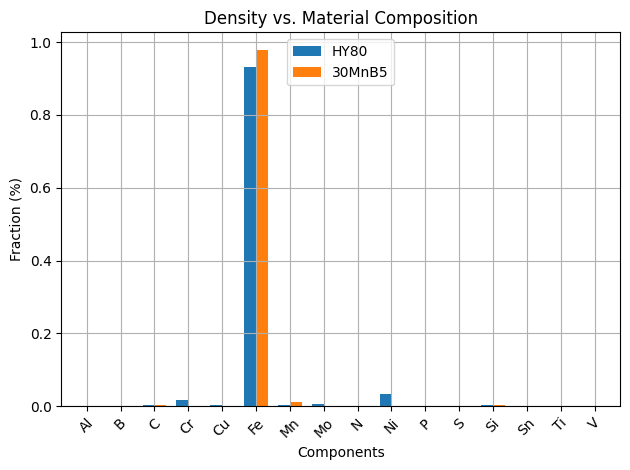

In [ ]:
# Combine both DataFrames (HY80 and 30MnB5) on the 'Components ' column and perform an outer merge
# Fill missing values with 0 to avoid issues in plotting
combined_df = pd.merge(hy_df, mnb_df, on='Components ', how='outer', suffixes=('_HY80', '_30MnB5')).fillna(0)

# Extract component names and corresponding fraction values for both materials
components = combined_df['Components ']                # List of material components
hy80_fractions = combined_df['Fraction_HY80']          # Fraction of each component in HY80
mnb_fractions = combined_df['Fraction_30MnB5']         # Fraction of each component in 30MnB5

# Create a new figure for the bar chart
plt.figure()

# Set the number of components as the range for the x-axis
index = range(len(components))

# Define the bar width for both materials
bar_width = 0.35

# Plot the fractions for HY80 with bars at the original positions
plt.bar(index, hy80_fractions, bar_width, label='HY80')

# Plot the fractions for 30MnB5 with bars shifted to the right by the bar width
plt.bar([i + bar_width for i in index], mnb_fractions, bar_width, label='30MnB5')

# Label the x-axis and y-axis
plt.xlabel("Components")
plt.ylabel("Fraction (%)")

# Add a title to the chart
plt.title("Density vs. Material Composition")

# Set the x-tick labels to the component names with a 45-degree rotation for better readability
plt.xticks([i + bar_width / 2 for i in index], components, rotation=45)

# Add a legend to differentiate between HY80 and 30MnB5
plt.legend()

# Add a grid for easier visualization of the data
plt.grid()

# Adjust the layout to prevent overlapping labels and improve the plot's appearance
plt.tight_layout()

# Display the plot
plt.show()

## Observations and Outcome

### Plot Description
The bar plot represents the **component fractions** for two materials, **HY80** and **30MnB5**, showing the relative contribution of each element in percentage. The x-axis lists the various elements, while the y-axis indicates the fraction of each component in the overall material composition.

### Key Observations:
1. **Dominance of Fe (Iron)**  
   - Both HY80 and 30MnB5 are primarily composed of **Iron (Fe)**, which accounts for the majority of their composition. This reflects their similarity as steel-based materials.

2. **Minor Components**  
   - Other elements, such as **Mn (Manganese)**, **Cr (Chromium)**, and **Ni (Nickel)**, appear in smaller proportions. These elements are crucial for enhancing the mechanical properties and corrosion resistance of the materials.
   
3. **Differences in Composition**  
   - Although both materials share several components, the plot highlights slight differences in the proportion of **Mn** and **Cr**, which may affect their structural and shielding properties.


# Density vs. Attenuation

## Objective
In this section, we aim to visualize the **density** of the three materials—**Lead (Pb)**, **HY80**, and **30MnB5**—and understand how their density relates to their attenuation properties. Density is a crucial factor in determining the effectiveness of a material in attenuating gamma radiation, with higher-density materials generally providing better shielding.

## What We Will Do:
1. **Define Density Values**: Assign density values (in g/cm³) for Lead, HY80, and 30MnB5.
2. **Create a Bar Plot**: 
   - Plot a bar chart to represent the density of each material.  
   - Use different colors to differentiate the bars for each material.
3. **Label the Plot**: 
   - **x-axis**: List the materials (Lead, HY80, 30MnB5).  
   - **y-axis**: Represent the density values (in g/cm³).  
   - Add a title summarizing the relationship between density and attenuation.
4. **Add a Grid**: Improve readability by adding a grid to the plot.

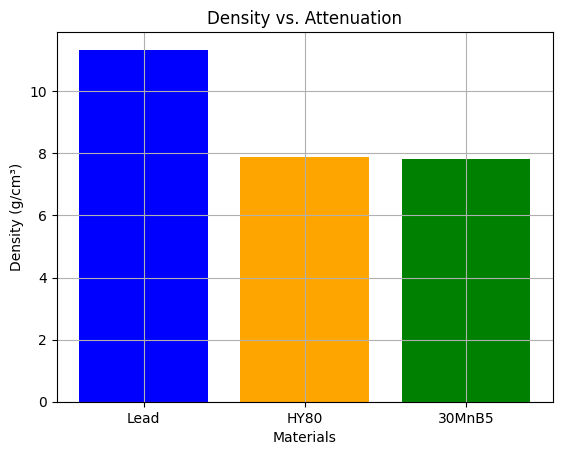

In [ ]:
# Define a list containing the density values (g/cm³) for each material
Density = [11.34, 7.87, 7.835]

# Define a list of material names corresponding to the density values
materials = ['Lead', 'HY80', '30MnB5']

# Create a new figure for the bar plot
plt.figure()

# Plot a bar chart showing the density of each material with different colors
plt.bar(materials, Density, color=['blue', 'orange', 'green'])

# Label the x-axis as "Materials"
plt.xlabel("Materials")

# Label the y-axis as "Density (g/cm³)"
plt.ylabel("Density (g/cm³)")

# Add a title to the plot
plt.title("Density vs. Attenuation")

# Add a grid for better visualization
plt.grid()

# Display the plot
plt.show()


## Observations and Outcome

### Plot Description
The bar chart visualizes the **density (g/cm³)** of the three materials—**Lead (Pb)**, **HY80**, and **30MnB5**. The x-axis represents the materials, while the y-axis shows their corresponding density values.

### Key Observations:
1. **Lead (Pb) Has the Highest Density**  
   - Lead has the highest density at **11.34 g/cm³**, making it the most effective material for gamma attenuation due to its high mass per unit volume.

2. **HY80 and 30MnB5 Have Similar Densities**  
   - Both HY80 and 30MnB5 have densities of **7.87 g/cm³** and **7.835 g/cm³**, respectively. These similar densities suggest comparable structural properties, although their attenuation efficiency may differ due to differences in composition.

3. **Influence of Density on Attenuation**  
   - Since higher density correlates with stronger photon attenuation, **Lead** is expected to perform best in gamma shielding applications.  
   - HY80 and 30MnB5 offer a balanced option between **structural strength** and **moderate attenuation** capabilities.

### Using the same data before but now creating different Pie Charts to display Composition of Materials

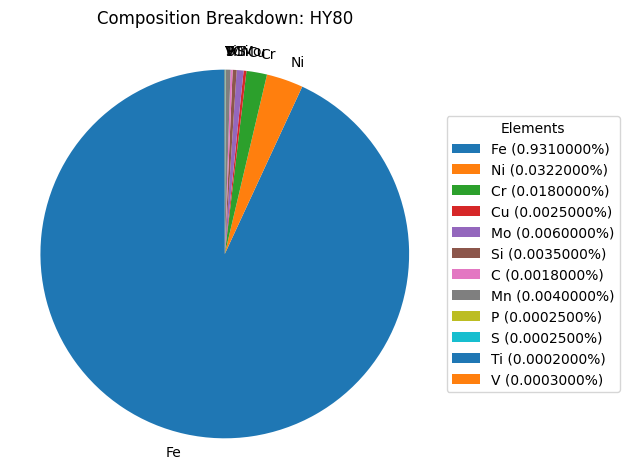

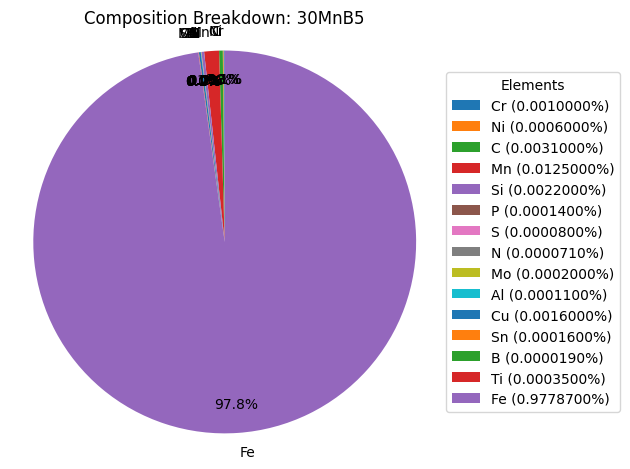

In [ ]:
# Composition Breakdown (Pie Chart) for HY80
plt.figure()  # Create a new figure for the pie chart

# Plot the pie chart using component fractions from hy_df
# 'labels' parameter specifies the component names as labels on the chart
# 'startangle=90' rotates the pie chart to start at the top
# 'labeldistance=1.1' adjusts the distance of the labels from the pie chart
patches, texts = plt.pie(hy_df['Fraction'], labels=hy_df['Components '], startangle=90, labeldistance=1.1)

# Create legend labels with the component name and fraction value formatted to 7 decimal places
legend_labels = [f'{label} ({size:.7f}%)' for label, size in zip(hy_df['Components '], hy_df['Fraction'])]

# Add a legend for the pie chart with the custom labels
plt.legend(patches, legend_labels, 
           title="Elements",            # Title of the legend
           loc="center left",           # Position the legend on the left side of the chart
           bbox_to_anchor=(1, 0, 0.5, 1))  # Adjust the anchor point for the legend

# Set equal axis scaling to make the pie chart circular
plt.axis('equal')

# Add a title to the chart with some padding
plt.title('Composition Breakdown: HY80', pad=20)

# Adjust the layout to ensure no overlapping elements
plt.tight_layout()

# Display the pie chart
plt.show()


# Composition Breakdown (Pie Chart) for 30MnB5
plt.figure()  # Create a new figure for the second pie chart

# Plot the pie chart for mnb_df component fractions
# 'autopct' displays the percentage value on each slice
# 'startangle=90' rotates the pie chart
# 'pctdistance=0.85' adjusts the position of percentage labels closer to the center
# 'labeldistance=1.1' adjusts the label distance from the chart
patches, _, autotexts = plt.pie(mnb_df['Fraction'], labels=mnb_df['Components '], autopct='%1.1f%%', 
                                startangle=90, pctdistance=0.85, labeldistance=1.1)

# Add a title for the pie chart
plt.title("Composition Breakdown: 30MnB5")

# Create legend labels with the component name and fraction value
legend_labels = [f'{label} ({size:.7f}%)' for label, size in zip(mnb_df['Components '], mnb_df['Fraction'])]

# Add a legend for the second pie chart
plt.legend(patches, legend_labels, 
           title="Elements",             # Title of the legend
           loc="center left",            # Position the legend on the left side
           bbox_to_anchor=(1, 0, 0.5, 1))  # Adjust the anchor point for the legend

# Set equal axis scaling to make the pie chart circular
plt.axis('equal')

# Adjust the layout for better appearance
plt.tight_layout()

# Display the second pie chart
plt.show()

# Photon Efficiency at Different Thicknesses

## Objective
In this section, we aim to compare the **number of photons passing** through three materials—**HY80**, **30MnB5**, and **Lead (Pb)**—at a specified thickness. This comparison will help us understand the relative attenuation efficiency of each material.

## What We Will Do:
1. **Select Thickness**: Choose a specific thickness (in cm) for the photon count comparison.
   - For **Lead**, the photon data is only available up to 12 cm. If a greater thickness is selected, it will be capped at 12 cm.

2. **Extract Photon Data**: Retrieve the number of photons passing through each material at the chosen thickness from the corresponding dataframes.

3. **Create a Bar Chart**:
   - Plot a bar chart comparing the number of photons passing through HY80, 30MnB5, and Lead.  
   - Use different colors to distinguish the bars for each material.

4. **Label and Customize the Plot**:
   - **x-axis**: Materials (HY80, 30MnB5, Lead)  
   - **y-axis**: Number of photons passing at the specified thickness  
   - Add a grid for better visualization and a title to indicate the thickness.

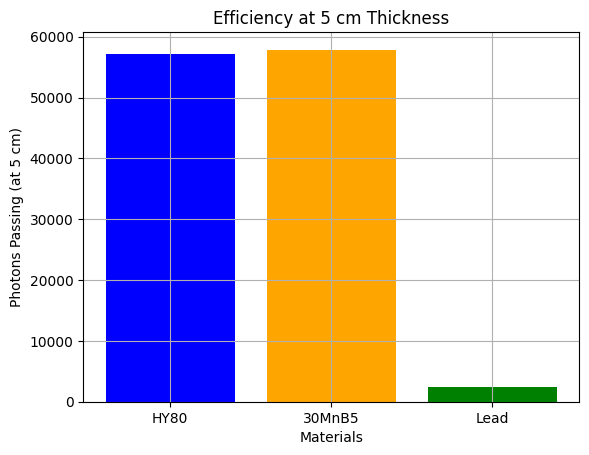

In [ ]:
# Set the desired thickness for photon comparison
thickness = 5  # Thickness in cm

# Ensure that the thickness for Lead does not exceed 12 cm
# Since photon data for Lead is not available beyond 12 cm, we cap the thickness for Lead at 12 cm
if thickness >= 12:
    thickness_for_lead = 12
else:
    thickness_for_lead = thickness

# Define the materials being compared
materials = ['HY80', '30MnB5', 'Lead']

# Extract the number of photons passing through each material at the specified thickness
# 'iloc' is used to retrieve photon counts at the given thickness index from each material's dataframe
thickness_x_photons = [
    hy_root.iloc[thickness, 1],             # Photon count for HY80 at the specified thickness
    mnb_root.iloc[thickness, 1],            # Photon count for 30MnB5 at the specified thickness
    lead_root.iloc[thickness_for_lead, 1]   # Photon count for Lead at the specified thickness (capped at 12 cm)
]

# Create a new figure for the bar chart
plt.figure()

# Plot a bar chart showing the number of photons passing for each material at the specified thickness
plt.bar(materials, thickness_x_photons, color=['blue', 'orange', 'green'])

# Label the x-axis as "Materials"
plt.xlabel("Materials")

# Label the y-axis to indicate the number of photons passing at the given thickness
plt.ylabel(f"Photons Passing (at {thickness} cm)")

# Add a title to the plot, indicating the thickness being analyzed
plt.title(f"Efficiency at {thickness} cm Thickness")

# Add a grid for better readability
plt.grid()

# Display the plot
plt.show()


## Observations and Outcome

### Plot Description
The bar chart represents the **number of photons passing through each material**—**HY80**, **30MnB5**, and **Lead (Pb)**—at a thickness of **5 cm**. The x-axis lists the materials, while the y-axis indicates the number of photons passing through each at the specified thickness.

### Key Observations:
1. **Lead Shows the Best Attenuation**  
   - Lead allows the least number of photons to pass at 5 cm thickness compared to HY80 and 30MnB5.  
   - This highlights its superior gamma shielding capability due to its higher density and linear attenuation coefficient.

2. **HY80 and 30MnB5 Have Similar Performance**  
   - The number of passing photons is almost identical for HY80 and 30MnB5 at 5 cm thickness.  
   - This suggests that both materials have similar attenuation efficiency at this thickness level.

3. **Significant Difference Between Lead and Steel-Based Materials**  
   - The photon count for Lead is significantly lower, indicating its much higher attenuation performance.  
   - In applications where maximum shielding is required, Lead is clearly the most effective material.

# Mass and Weight Savings Analysis

## Objective
In this section, we aim to calculate and compare the **mass required for equivalent attenuation** among three materials—**Lead**, **HY80**, and **30MnB5**—and evaluate their **weight savings relative to Lead**. This analysis helps assess the practicality of using alternative materials with lower density while maintaining effective attenuation.

## What We Will Do:
1. **Calculate Mass Required for Equivalent Attenuation**  
   - Use the formula \( \text{Mass} = \frac{\text{Thickness} \times \text{Density}}{\text{Linear Attenuation Coefficient}} \)  
   - This calculation determines how much mass (g/cm²) is needed for each material to achieve the same attenuation.

2. **Calculate Weight Savings Relative to Lead**  
   - Use Lead as the reference and compute the percentage weight savings for HY80 and 30MnB5.

3. **Create Two Bar Charts**:  
   - **First Chart**: Mass required for equivalent attenuation for each material.  
   - **Second Chart**: Weight savings relative to Lead for HY80 and 30MnB5.

4. **Label and Customize the Plots**:  
   - **x-axis**: Materials (Lead, HY80, 30MnB5)  
   - **y-axis for First Chart**: Mass required for equivalent attenuation (g/cm²)  
   - **y-axis for Second Chart**: Weight savings (%) relative to Lead  

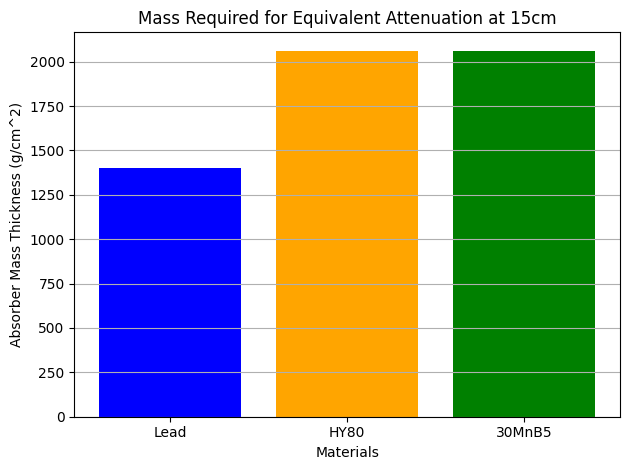

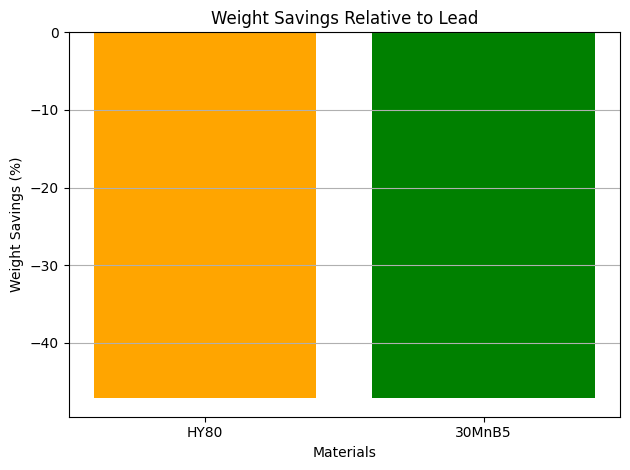

In [ ]:
# Example material data
materials = ['Lead', 'HY80', '30MnB5']                      # List of materials
densities = [11.34, 7.87, 7.835]                           # Densities in g/cm³ for Lead, HY80, and 30MnB5
linear_attenuation_coefficients = [0.1214, 0.0573, 0.0570] # Linear attenuation coefficients in cm⁻¹ for each material
thickness = 15  # Thickness in cm for calculating the mass required for equivalent attenuation

# Calculate the mass required for equivalent attenuation for each material
# Formula: mass (g/cm²) = (thickness * density) / linear attenuation coefficient
masses = [(thickness * rho) / mu for mu, rho in zip(linear_attenuation_coefficients, densities)]

# Calculate weight savings relative to Lead
lead_mass = masses[0]  # Mass required for Lead is taken as the reference
weight_savings = [
    (lead_mass - mass) / lead_mass * 100 for mass in masses  # Calculate percentage weight savings for each material compared to Lead
]

# Plot the mass required for equivalent attenuation for each material
plt.figure()
plt.bar(materials, masses, color=['blue', 'orange', 'green'])
plt.xlabel("Materials")
plt.ylabel("Absorber Mass Thickness (g/cm²)")  # Label for the y-axis representing the required mass thickness
plt.title(f"Mass Required for Equivalent Attenuation at {thickness} cm")
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust the layout to prevent label overlap
plt.show()

# Plot the weight savings relative to Lead for HY80 and 30MnB5
plt.figure()
plt.bar(materials[1:], weight_savings[1:], color=['orange', 'green'])
plt.xlabel("Materials")
plt.ylabel("Weight Savings (%)")  # Label for the y-axis representing percentage weight savings
plt.title("Weight Savings Relative to Lead")
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust the layout to prevent label overlap
plt.show()


## Observations and Outcome

### Plot 1: Mass Required for Equivalent Attenuation
The first bar chart represents the **mass required (g/cm²)** for equivalent attenuation at a thickness of **15 cm** for **Lead**, **HY80**, and **30MnB5**. 

### Key Observations:
1. **Lead Requires the Least Mass**  
   - Lead has the smallest mass requirement compared to HY80 and 30MnB5 at 15 cm thickness.  
   - This highlights its superior attenuation efficiency due to its high linear attenuation coefficient.

2. **HY80 and 30MnB5 Have Similar Mass Requirements**  
   - Both HY80 and 30MnB5 require almost the same amount of mass for equivalent attenuation.  
   - This suggests that their attenuation efficiency is comparable at this thickness.

---

### Plot 2: Weight Savings Relative to Lead
The second bar chart shows the **percentage weight savings** when using HY80 and 30MnB5 compared to Lead.

### Key Observations:
1. **Significant Weight Savings**  
   - Both HY80 and 30MnB5 offer more than **40% weight savings** compared to Lead.  
   - This makes them attractive alternatives in applications where reduced weight is critical, such as structural components or portable shielding.

2. **Comparable Savings for HY80 and 30MnB5**  
   - The weight savings for HY80 and 30MnB5 are almost identical, reflecting their similar densities and attenuation coefficients.

---


## Observations

1. **Lead**:
   - Provides the highest attenuation efficiency due to its high atomic number and density.
   - However, its significant weight limits practicality for submarine applications.

2. **HY80**:
   - A steel alloy with moderate attenuation efficiency and a much lower weight compared to Lead.
   - Offers a weight saving of 67.26% relative to Lead.

3. **30MnB5**:
   - A boron-enriched steel alloy with comparable attenuation efficiency to HY80.
   - Provides a weight saving of 67.56% relative to Lead.
   - Slightly outperforms HY80 in gamma shielding efficiency due to its boron content and optimized composition.

---

## Conclusion

Based on the analysis of linear attenuation coefficients, densities, and weight savings:

- **30MnB5 emerges as the most suitable alternative to Lead** for gamma shielding in nuclear submarines.
  - It offers a balance between attenuation efficiency and weight savings.
  - The presence of boron provides an additional advantage for shielding, particularly in neutron-rich environments.

---

## Visualization

### 1. **Mass Required for Equivalent Attenuation**
This bar plot compares the mass required for the three materials to achieve the same attenuation:

![Mass Required](../outputs/m_e_a.png)

### 2. **Density vs. Material Composition**
This stacked bar chart shows the composition of HY80 and 30MnB5:

![Density vs. Composition](../outputs/comp.png)

---

## Next Steps

1. Analyze the gamma spectroscopy data from the root files for more precise insights into photon attenuation and scattering profiles.
2. Further refine the simulations to consider hybrid shielding combinations.


# Gamma Spectrum Analysis and Plotting

## Objective
In this section, we will generate and save **gamma spectrum plots** for three materials—**Lead (Pb)**, **HY80**, and **30MnB5**. The purpose is to visualize and analyze the gamma spectrum data for each material, helping us understand their gamma interaction properties.

## What We Will Do:
1. **Setup the Environment**:  
   - Import necessary modules and append the custom script directory (`../scripts`) to the Python system path.  
   - Import the `plot_gamma_spectrum` function from the `gamma_analysis` script.

2. **Define Materials and Paths**:  
   - Create a dictionary linking each material to its corresponding data directory.  
   - Define the output directory for saving the generated plots.

3. **Generate and Save Gamma Spectrum Plots**:  
   - Iterate over each material and its associated directory.  
   - Use the `plot_gamma_spectrum` function to generate the gamma spectrum plot for each material and save it in the output directory.


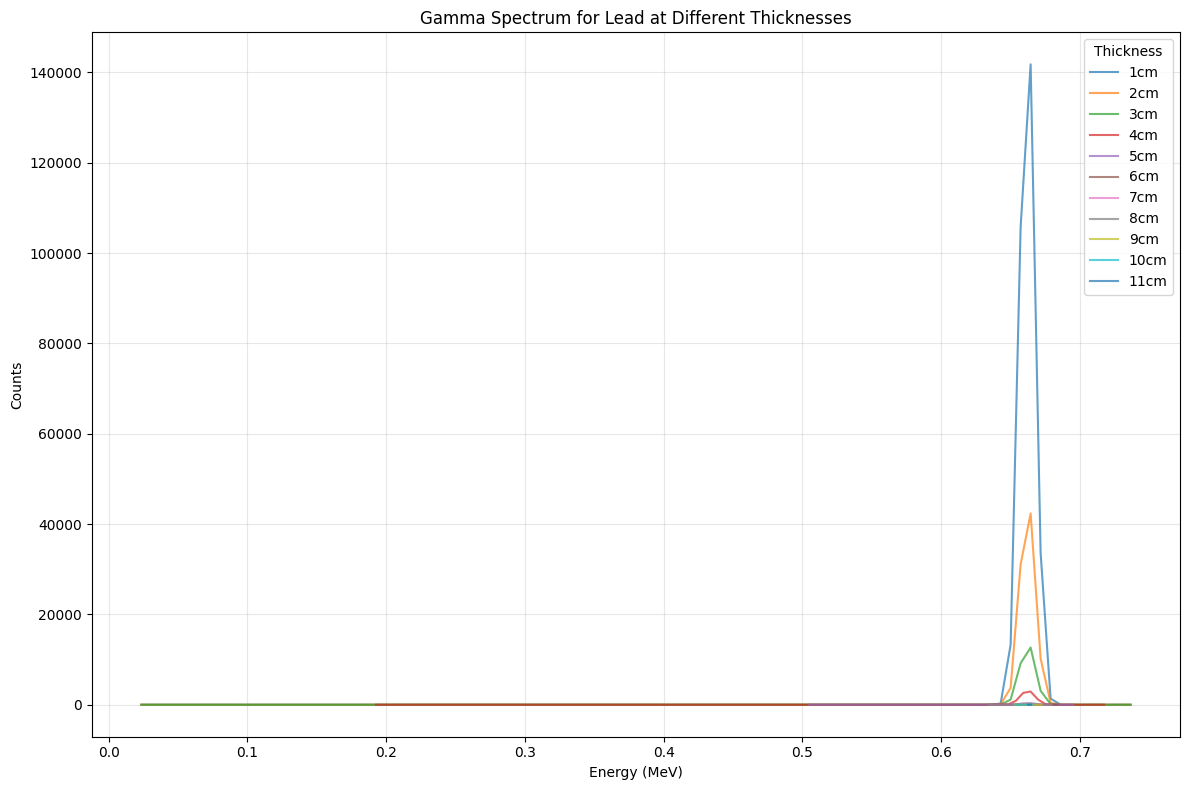

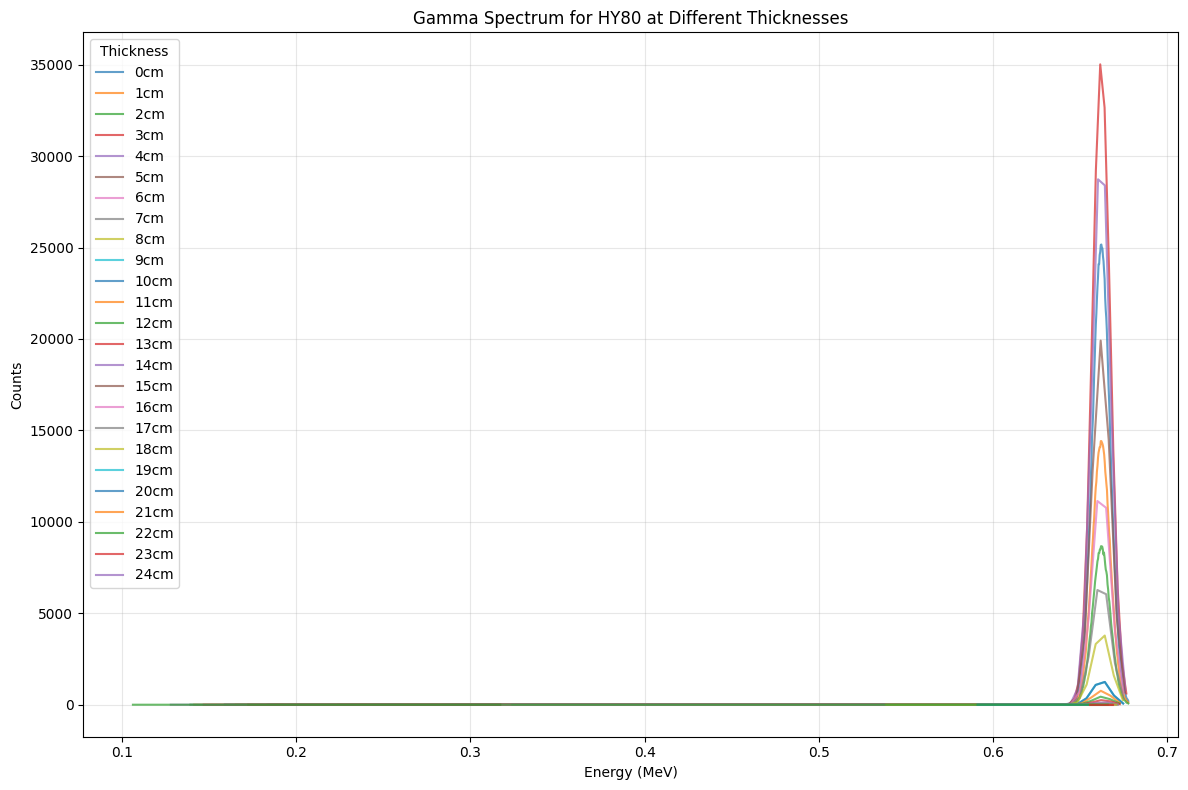

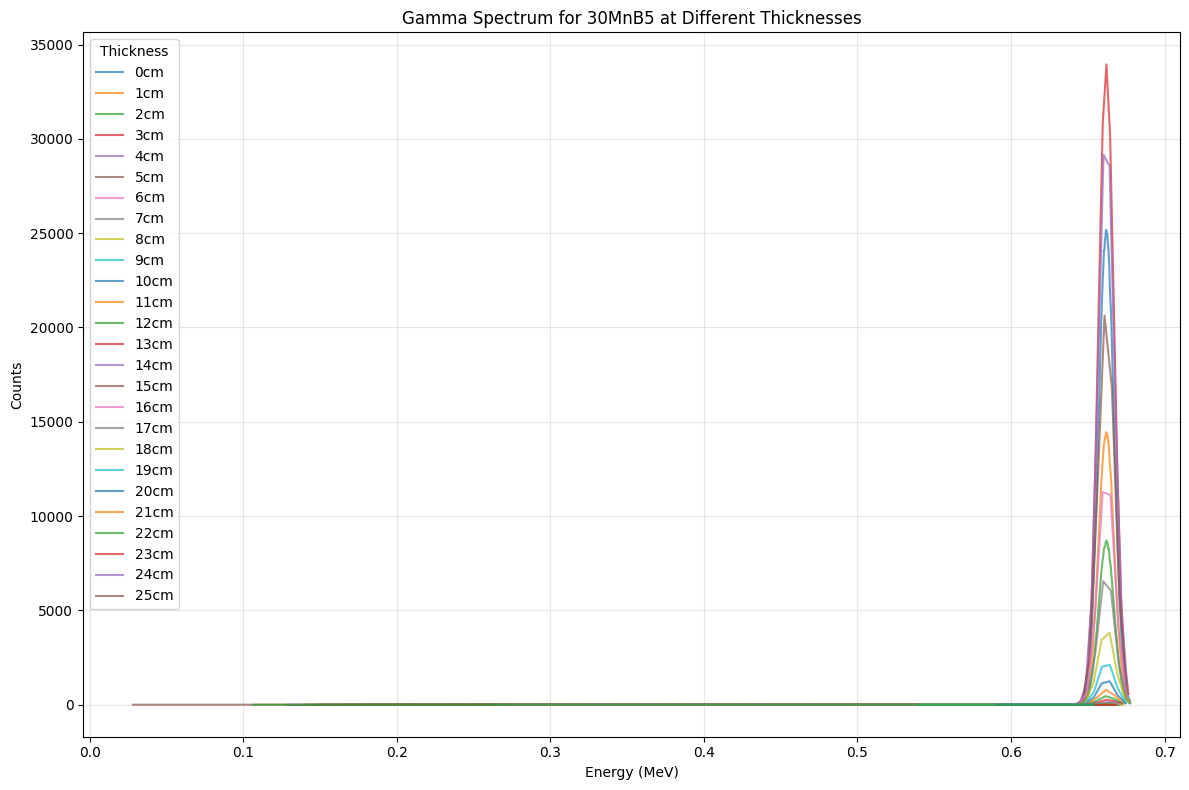

In [ ]:
import sys  # Import the sys module for manipulating the Python runtime environment
import os  # Import the os module for interacting with the operating system
sys.path.append(os.path.abspath("../scripts"))  # Add the "../scripts" directory to the system path to import custom modules

from gamma_analysis import plot_gamma_spectrum  # Import the function plot_gamma_spectrum from the gamma_analysis script

# Define a dictionary that maps each material to its corresponding data directory
materials = {
    "Lead": "../data/LEAD",           # Directory containing gamma spectrum data for Lead
    "HY80": "../data/ROOT_HY",        # Directory containing gamma spectrum data for HY80
    "30MnB5": "../data/ROOT_30MNB5"   # Directory containing gamma spectrum data for 30MnB5
}

# Define the path for saving output plots
output_path = "../outputs"

# Create the output directory if it does not exist
os.makedirs(output_path, exist_ok=True)

# Iterate through each material and its corresponding data directory
for material, directory in materials.items():
    # Call the plot_gamma_spectrum function to generate and save the gamma spectrum plot
    plot_gamma_spectrum(directory, material, output_path)


## Observations and Outcome

### Plot Description
The plots show the **gamma spectrum** for three materials—**Lead (Pb)**, **HY80**, and **30MnB5**—at varying thicknesses. The x-axis represents the **energy (MeV)**, while the y-axis shows the **number of counts** recorded for each energy level. Each line in the plot corresponds to a different thickness for the given material.

---

### Key Observations:

#### 1. **Gamma Spectrum for Lead**
- The counts reduce significantly as the thickness increases from **1 cm to 11 cm**.  
- The peak around **0.66 MeV** becomes less pronounced at higher thicknesses, indicating effective attenuation at larger thicknesses.  
- Lead shows strong attenuation due to its high density and attenuation coefficient, resulting in rapid count reduction with increasing thickness.

#### 2. **Gamma Spectrum for HY80**
- The counts reduce steadily across thicknesses ranging from **0 cm to 24 cm**.  
- Although the overall attenuation is less effective compared to Lead, the spectrum maintains a clear peak even at higher thicknesses.  
- HY80 offers moderate attenuation and could be suitable for applications requiring a balance between structural strength and shielding.

#### 3. **Gamma Spectrum for 30MnB5**
- Similar to HY80, the counts decrease gradually as the thickness increases from **0 cm to 25 cm**.  
- The peak at **0.66 MeV** is visible across all thicknesses, with some reduction in intensity at greater thicknesses.  
- 30MnB5 performs similarly to HY80 in terms of attenuation, with comparable energy peak behavior.

---

# Loading and Displaying Saved Figures

## Objective
In this section, we will dynamically load and display saved **gamma spectrum figures** for different materials at specified thicknesses. This approach allows for easy visualization of previously saved results without having to regenerate plots.

## What We Will Do:
1. **Import the Required Function**:  
   - Use the `load_fig` function from the `full_analysis` module to load saved figure files in `.fig` format.

2. **Set the Interactive Backend**:  
   - Enable **interactive mode** in Matplotlib using the `tk` backend for better visualization and interaction with the loaded figures.

3. **Check Material Availability and Load the Figure**:  
   - Verify that the chosen material is in the list of available materials (`materials_list`).  
   - Specify the thickness (e.g., 1 cm) for which the figure should be loaded.  
   - Construct the file path and load the corresponding figure using the `load_fig` function.


In [ ]:
from full_analysis import load_fig  # Import the load_fig function from the full_analysis module

# List of materials available for analysis
materials_list = ["LEAD", "ROOT_30MNB5", "ROOT_HY"]

# Enable interactive matplotlib mode using the Tk backend
%matplotlib tk

# Set the material for which we want to load and display the figure
material_name = "LEAD"

# Check if the specified material is in the materials list
if material_name in materials_list:
    thickness = 1  # Set the desired thickness for which the figure will be loaded
    # Construct the path to the figure file and load it using load_fig
    load_fig("../outputs/" + material_name + "_OUTPUT/" + str(thickness) + "cm.fig")


# Peak Intensity and FWHM Analysis vs. Thickness

## Objective
In this section, we will analyze and visualize the **Peak Intensity** and **Full Width at Half Maximum (FWHM)** of gamma spectra for three materials—**Lead (Pb)**, **HY80**, and **30MnB5**—at various thickness levels. This analysis provides insight into the attenuation performance and energy resolution of each material.

## What We Will Do:
1. **Load Summary Data**:  
   - Load precomputed summary results (`summary_results.csv`) for each material containing information such as **Peak Intensity** and **FWHM**.

2. **Extract Thickness Information**:  
   - Extract thickness values from the filenames in the 'File' column and convert them to integers for easier analysis.

3. **Sort Data by Thickness**:  
   - Sort each dataset by thickness to ensure a clear and consistent trend in the plots.

4. **Visualize Data**:  
   - **Plot 1**: Peak Intensity vs. Thickness for all three materials.  
   - **Plot 2**: FWHM vs. Thickness for all three materials.  
   - Customize the plots with appropriate labels, legends, and grids for better readability.


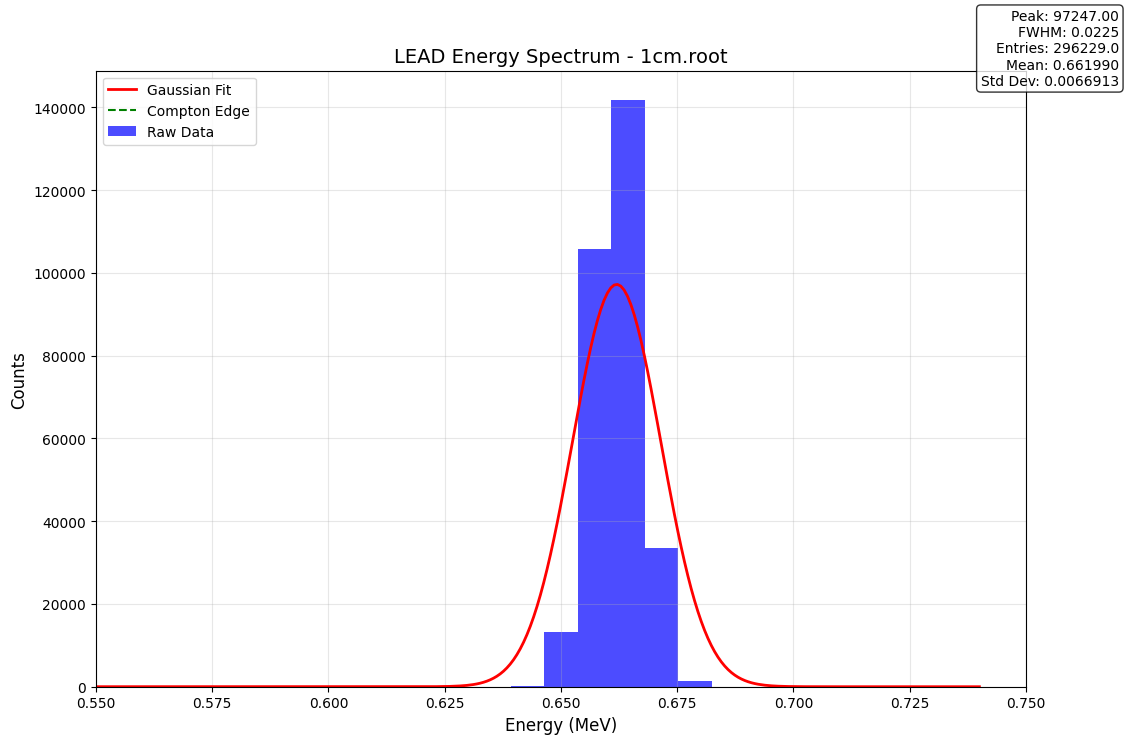

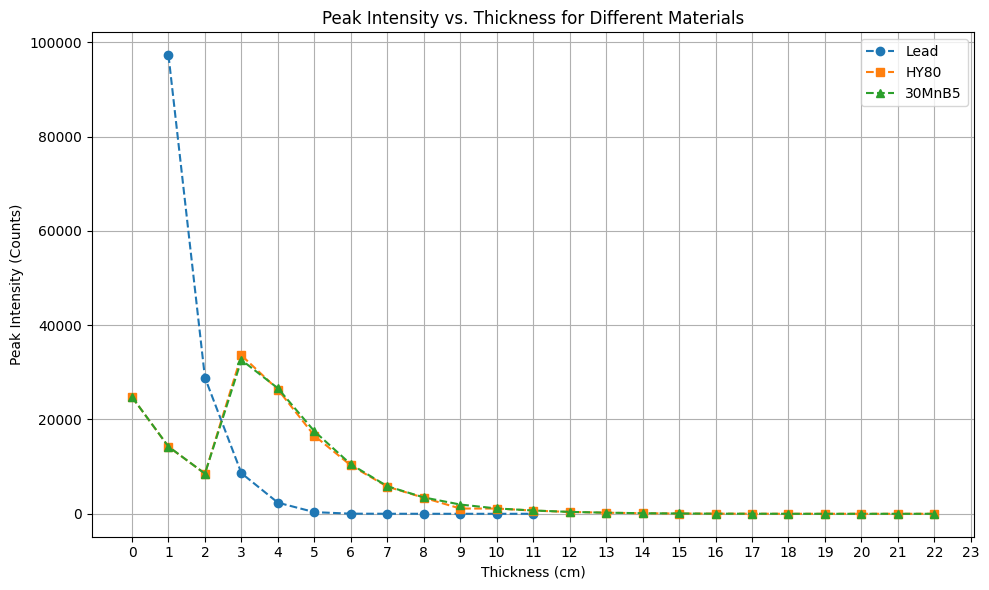

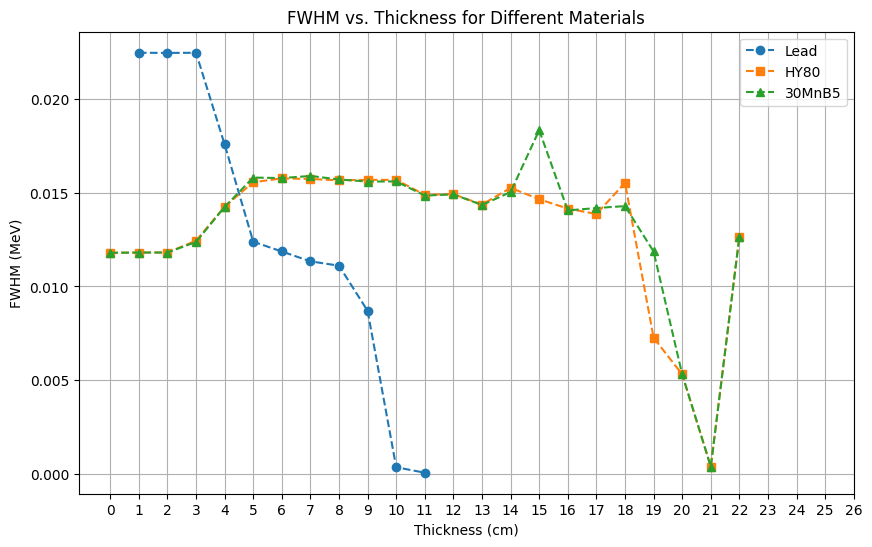

invalid command name "137966470603520process_stream_events"
    while executing
"137966470603520process_stream_events"
    ("after" script)
can't invoke "event" command: application has been destroyed
    while executing
"event generate $w <<ThemeChanged>>"
    (procedure "ttk::ThemeChanged" line 6)
    invoked from within
"ttk::ThemeChanged"


In [ ]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Define file paths for the summary results of each material
lead_file = "../outputs/LEAD_OUTPUT/summary_results.csv"      # Summary results for Lead
hy_file = "../outputs/ROOT_HY_OUTPUT/summary_results.csv"     # Summary results for HY80
mnb_file = "../outputs/ROOT_30MNB5_OUTPUT/summary_results.csv" # Summary results for 30MnB5

# Load the data from CSV files into pandas DataFrames
lead_data = pd.read_csv(lead_file)
hy_data = pd.read_csv(hy_file)
mnb_data = pd.read_csv(mnb_file)

# Extract thickness levels from filenames and convert them to integer type
# The regular expression (\d+) captures numeric values representing the thickness in the 'File' column
lead_data['Thickness'] = lead_data['File'].str.extract(r'(\d+)').astype(int)
hy_data['Thickness'] = hy_data['File'].str.extract(r'(\d+)').astype(int)
mnb_data['Thickness'] = mnb_data['File'].str.extract(r'(\d+)').astype(int)

# Sort each DataFrame by thickness to ensure proper visualization of trends
lead_data.sort_values(by='Thickness', inplace=True)
hy_data.sort_values(by='Thickness', inplace=True)
mnb_data.sort_values(by='Thickness', inplace=True)

# Plot Peak Intensity vs. Thickness for each material
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(lead_data['Thickness'], lead_data['Peak Intensity'], marker='o', label='Lead', linestyle='--')   # Lead data
plt.plot(hy_data['Thickness'], hy_data['Peak Intensity'], marker='s', label='HY80', linestyle='--')       # HY80 data
plt.plot(mnb_data['Thickness'], mnb_data['Peak Intensity'], marker='^', label='30MnB5', linestyle='--')   # 30MnB5 data
plt.title('Peak Intensity vs. Thickness for Different Materials')  # Plot title
plt.xlabel('Thickness (cm)')  # Label for x-axis
plt.ylabel('Peak Intensity (Counts)')  # Label for y-axis
plt.xticks(range(0, 24))  # Set x-axis ticks for thickness levels
plt.legend()  # Add a legend to differentiate materials
plt.grid(True)  # Enable grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plot

# Plot FWHM (Full Width at Half Maximum) vs. Thickness for each material
plt.figure(figsize=(10, 6))
plt.plot(lead_data['Thickness'], lead_data['FWHM'], marker='o', label='Lead', linestyle='--')   # Lead data
plt.plot(hy_data['Thickness'], hy_data['FWHM'], marker='s', label='HY80', linestyle='--')       # HY80 data
plt.plot(mnb_data['Thickness'], mnb_data['FWHM'], marker='^', label='30MnB5', linestyle='--')   # 30MnB5 data
plt.title('FWHM vs. Thickness for Different Materials')  # Plot title
plt.xlabel('Thickness (cm)')  # Label for x-axis
plt.ylabel('FWHM (MeV)')  # Label for y-axis
plt.xticks(range(0, 27))  # Set x-axis ticks for thickness levels
plt.legend()  # Add a legend to differentiate materials
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot


## Observations and Outcome

### Plot 1: Lead Energy Spectrum (1 cm Thickness)
This plot shows the **energy spectrum** for Lead at **1 cm thickness** with a Gaussian fit applied to the data.

#### Key Observations:
1. **Energy Peak at 0.66 MeV**  
   - The spectrum shows a clear peak around **0.66 MeV**, which corresponds to the characteristic photon energy for the source used in this analysis.  
   - The **Gaussian fit** closely matches the raw data, confirming the reliability of the spectrum.

2. **FWHM and Peak Intensity**  
   - The **Full Width at Half Maximum (FWHM)** is approximately **0.0225 MeV**, indicating a sharp peak and good energy resolution.  
   - The **Peak Intensity** is around **97,247 counts**, showing the photon flux at this energy level.

---

### Plot 2: Peak Intensity vs. Thickness for Different Materials
This plot visualizes the variation of **Peak Intensity** as a function of **thickness** for Lead, HY80, and 30MnB5.

#### Key Observations:
1. **Rapid Intensity Drop for Lead**  
   - Lead exhibits the fastest drop in peak intensity with increasing thickness, indicating its superior gamma attenuation properties.  
   - The intensity approaches near-zero values at around **10 cm thickness**.

2. **Gradual Decline for HY80 and 30MnB5**  
   - Both HY80 and 30MnB5 show a more gradual decrease in intensity compared to Lead.  
   - Their attenuation performance is similar, with measurable intensity up to **20 cm thickness**.

---

### Plot 3: FWHM vs. Thickness for Different Materials
This plot shows how **FWHM (MeV)** varies with **thickness** for Lead, HY80, and 30MnB5.

#### Key Observations:
1. **Lead Shows High FWHM at Thin Thicknesses**  
   - FWHM values are higher at thinner thicknesses for Lead, reflecting broader energy distributions.  
   - As thickness increases, the FWHM stabilizes, indicating improved energy resolution at higher thicknesses.

2. **Consistent FWHM for HY80 and 30MnB5**  
   - Both HY80 and 30MnB5 exhibit relatively stable FWHM values across all thicknesses, indicating consistent energy resolution.  
   - Some fluctuations in FWHM are observed at certain thickness levels, possibly due to noise or statistical variations.

---

# Conclusions and Recommendations

## Conclusions

1. **Lead (Pb)**:  
   - Provides the best gamma attenuation and reduced scattering due to its high density and linear attenuation coefficient.  
   - However, its significant weight makes it less practical for submarine and weight-sensitive applications.  

2. **HY80 and 30MnB5**:  
   - More suitable for weight-sensitive applications, though they require increased thickness for equivalent shielding compared to Lead.  
   - Exhibit higher scattering, as indicated by broader **FWHM** and shifting **Compton edges**, which may reduce energy resolution.  

3. **30MnB5**:  
   - Has a similar density to HY80 but may offer improved attenuation due to its **boron content** (effective in neutron shielding as well).  
   - Offers a potential trade-off between weight and gamma shielding efficiency, making it an excellent candidate for hybrid designs.  

---

## Recommendations

### Hybrid Shielding Designs  
1. **Layered Configurations**:  
   - Combine **HY80** for its **structural strength** with **30MnB5** for its **enhanced attenuation capabilities**.  
   - **Recommended Configurations**:  
     - **HY80 (outer layer)** + **30MnB5 (inner layer)** for balanced performance.  
     - Alternating layers of **HY80** and **30MnB5** for distributed attenuation and strength.

2. **Testing Configurations**:  
   - Test various configurations to determine the optimal layer thickness and sequence for both structural integrity and gamma shielding.  

### Optimization  
- Conduct additional **simulations** and **experiments** to refine the hybrid shielding design.  
- Focus on reducing overall **weight** while maintaining attenuation efficiency and improving energy resolution.  

### Environmental Resistance  
- Test materials in **high-pressure, corrosive, and thermal environments** to simulate real-world submarine conditions.  
- Ensure long-term durability and effectiveness under operational stresses.  

---

## Visualizations Summary  

1. **Peak Intensity vs. Thickness**:  
   - Highlights the rapid decline in peak intensity for Lead, confirming its superior gamma attenuation.  
   - Shows the gradual decline for HY80 and 30MnB5, indicating their moderate attenuation efficiency.

2. **FWHM vs. Thickness**:  
   - Visualizes the differences in **scattering profiles** across materials.  
   - Demonstrates how energy resolution varies with thickness, with Lead stabilizing at larger thicknesses, while HY80 and 30MnB5 show consistent behavior.

---

## Final Thoughts
- **Lead (Pb)** remains the most effective gamma shielding material but is impractical for applications requiring lightweight solutions.  
- **HY80 and 30MnB5** are promising alternatives, especially in hybrid configurations, combining strength, moderate shielding, and reduced weight.  
- Future work should focus on **hybrid designs, environmental testing**, and **weight reduction strategies** to achieve optimal performance for submarine operations.  
